# Make Grid

In [1]:
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def isRed(n,M,B,G,S=1024):
    if n < M:
        return True
    if n >= S-M:
        return True
    if (n-M)%(B+G) >= B:
        return True
    return False

In [3]:
def make_grid(M,B,G,S=1024):
    A = np.zeros((S,S,3))
    for i in range(S):
        for j in range(S):
            if isRed(i,M,B,G,S) or isRed(j,M,B,G,S):
                A[i,j,:] = np.array([255,0,0])
            else:
                A[i,j,:] = np.array([0,0,0])
    A = A.astype(np.uint8)
    return A

In [4]:
def show(arr):
    plt.imshow(arr)

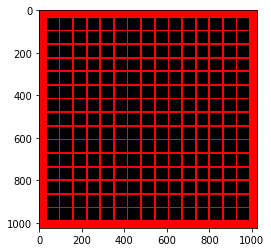

In [5]:
D = make_grid(36,56,8)
show(D)

In [6]:
img = Image.fromarray(D,"RGB")

In [7]:
img = Image.fromarray(D,"RGB")

In [16]:
img.save("grid_long.png")

# Flow Analysis

In [8]:
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np
import torch
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

makeTensor = transforms.ToTensor()
makePIL = transforms.ToPILImage()

def img_tensor(path):
    img = Image.open(path)
    return makeTensor(img)

def tensor_img(data,path="/home/fashionteam/data_pp/LAB.jpg"):
    img = makePIL(data)
    img.save(path)

In [4]:
#real data
data = img_tensor("/home/fashionteam/NCAP/dataset_MVC_up/train/0/2.jpg")
data = data.view((1,3,256,192))

FileNotFoundError: [Errno 2] No such file or directory: '/home/fashionteam/NCAP/dataset/train/0/2.jpg'

In [9]:
#theta
A = np.array([[[1,0,0],[0,2,0]]]).astype(np.float32)
A = torch.from_numpy(A)
print(A)

tensor([[[1., 0., 0.],
         [0., 2., 0.]]])


In [10]:
#Flow
net = F.affine_grid(A,(1,3,256,192))
print(net.shape)
res = F.grid_sample(data,net)
T = np.reshape(np.array(res),(3,256,192))
print(T.shape)
T = np.transpose(T,(1,2,0))
show(T)

torch.Size([1, 256, 192, 2])


/home/fashionteam/anaconda/envs/clothflow/lib/python3.8/site-packages/torch/nn/functional.py:2764: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


NameError: name 'data' is not defined

In [11]:
def visual_flow(flow,dense=0.05):
    width = len(flow[0]) #192
    height = len(flow) #256
    criterion_width = int(width*dense)
    criterion_height = int(width*dense)
    print(criterion_width,criterion_height)
    fig = plt.figure(figsize=(9,16))#figsize=(width, height))
    ax = fig.add_subplot(1,1,1) 
    ax.set(xlim=[0., width], ylim=[0, height], title='Flow', xlabel='width', ylabel='height')
    ax.plot((0,width-1,width-1,0,0),(0,0,height-1,height-1,0),color='red', linewidth=3)
    for i in range(height):
        for j in range(width):
            if i%criterion_height != 0 or j%criterion_width != 0:
                continue
            target_y = height-i
            target_x = j
            source_y = height - (flow[i,j,1]+1)*height/2
            source_x = (flow[i,j,0]+1)*width/2
            plt.arrow(source_x, source_y, target_x - source_x, target_y - source_y, length_includes_head=True, head_width=1.5, head_length=1.5,width=0.00005)
        
    plt.show()
    

In [13]:
#Flow
net = F.affine_grid(A,(1,3,256,192))
print(net.shape)
res = F.grid_sample(data,net)
T = np.reshape(np.array(res),(3,256,192))
print(T.shape)
T = np.transpose(T,(1,2,0))
temp = np.reshape(data,(3,256,192))
temp = np.transpose(temp,(1,2,0))
show(temp)
#show(T)

torch.Size([1, 256, 192, 2])


NameError: name 'data' is not defined

In [12]:
show(T)

NameError: name 'T' is not defined

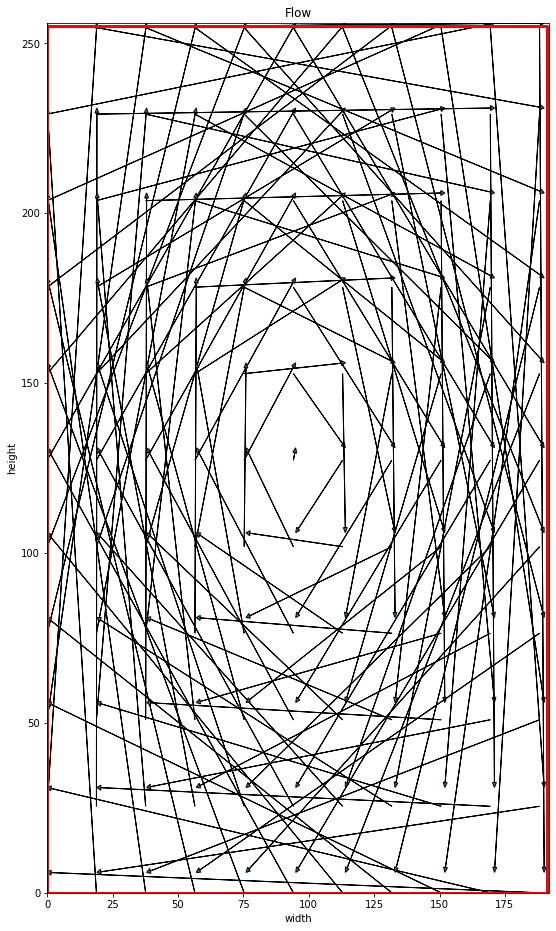

In [102]:
visual_flow(np.array(net[0,:,:,:]),0.1)

In [69]:
dataroot = "/home/fashionteam/ClothFlow/save_img/test5_nosmoothing/"
data = "0_600"

In [70]:
s = Image.open(dataroot+data+"/source.png")
t = Image.open(dataroot+data+"/target.png")
w = Image.open(dataroot+data+"/warp.png")

In [71]:
npd = np.load(dataroot+data+".npy")
npd = np.transpose(npd,(1,2,0))

15 15


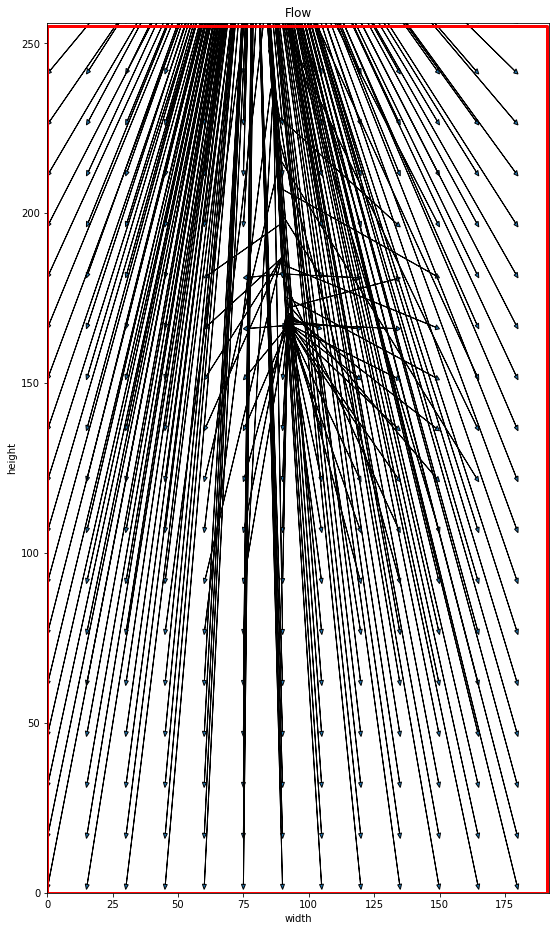

In [72]:
visual_flow(npd,0.08)

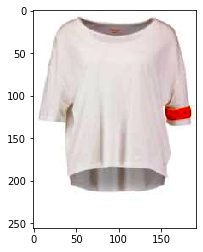

In [73]:
show(s)

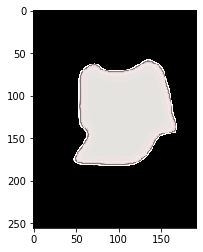

In [74]:
show(w)

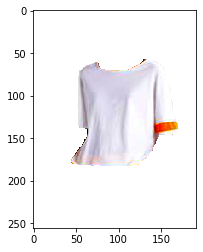

In [75]:
show(t)